In [1]:
import tensorflow as tf


In [4]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test  = x_test / 255.0
print(f'x_train.shape: {x_train.shape}')

x_train.shape: (60000, 28, 28)


In [5]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2990 - accuracy: 0.9127 - val_loss: 0.1431 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1464 - accuracy: 0.9560 - val_loss: 0.1019 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1080 - accuracy: 0.9672 - val_loss: 0.0873 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0882 - accuracy: 0.9728 - val_loss: 0.0807 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0765 - accuracy: 0.9756 - val_loss: 0.0715 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0648 - accuracy: 0.9794 - val_loss: 0.0715 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0685 - val_accuracy:

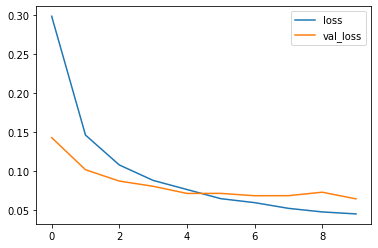

In [6]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

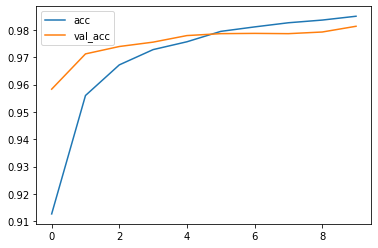

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 0s 952us/step - loss: 0.0645 - accuracy: 0.9813
[0.06450869143009186, 0.9812999963760376]
Confusion matrix, without normalization
[[ 968    0    0    2    2    1    2    1    3    1]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   4    1 1000    5    3    0    2    9    8    0]
 [   0    0    2  993    0    5    0    4    3    3]
 [   1    0    2    1  967    0    5    0    0    6]
 [   2    1    0    5    2  871    4    1    3    3]
 [   1    3    1    1    4    5  943    0    0    0]
 [   1    3    7    2    0    0    0 1007    3    5]
 [   1    0    3    4    3    4    1    2  955    1]
 [   1    2    0    2   12    3    0    2    4  983]]


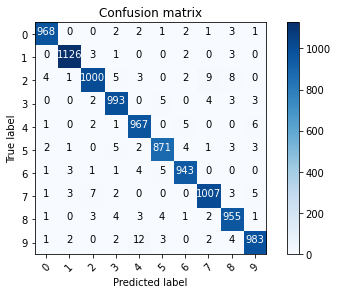

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 6. Predicted: 5')

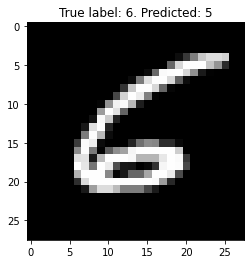

In [11]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
# select one of these randomly misclassified indices
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]}. Predicted: {p_test[i]}')